In [82]:
import matplotlib.pyplot as plt

In [80]:
%matplotlib inline

In [54]:
import torch
import torchvision.transforms as T
import numpy as np
from PIL import Image

In [55]:
from r3m import load_r3m

In [ ]:
r3m18 = load_r3m("resnet18") # resnet18, resnet34
r3m18.eval();
r3m18.to('cuda');

In [ ]:
r3m18cpu = load_r3m("resnet18") # resnet18, resnet34
r3m18cpu.eval();
r3m18cpu = r3m18cpu.module.to('cpu')

In [56]:
transforms = T.Compose([T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor()]) # ToTensor() divides by 255

In [68]:
rng = np.random.RandomState(seed=1)
image = rng.randint(0, 255, (500, 500, 3));

In [69]:
preprocessed_image_gpu = transforms(Image.fromarray(image.astype(np.uint8))).reshape(-1, 3, 224, 224)
preprocessed_image_gpu.to('cuda');

In [86]:
with torch.no_grad():
  embeddinggpu = r3m18(preprocessed_image_gpu * 255.0) ## R3M expects image input to be [0-255]

In [71]:
## ENCODE IMAGE
preprocessed_image = transforms(Image.fromarray(image.astype(np.uint8))).reshape(-1, 3, 224, 224)
preprocessed_image.to('cpu');

In [72]:
with torch.no_grad():
  embeddingcpu = r3m18cpu(preprocessed_image * 255.0) ## R3M expects image input to be [0-255]

In [73]:
diff = embeddinggpu.to('cpu') - embeddingcpu

In [74]:
np.abs(diff).max() 

tensor(4.7684e-07)

In [75]:
np.abs(embeddingcpu).mean()

tensor(0.0670)

Text(0, 0.5, 'cpu computation')

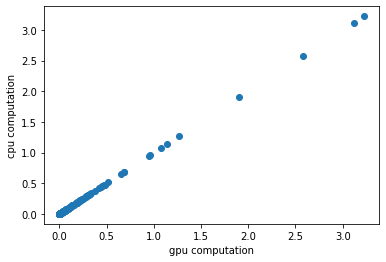

In [89]:
plt.scatter(embeddinggpu.to('cpu'), embeddingcpu)
plt.xlabel('gpu computation')
plt.ylabel('cpu computation')